In [2]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve

X, y = make_classification(n_samples=100, n_features=10, random_state=42)

tree = DecisionTreeClassifier(max_depth=4, random_state=42)

# train_size_abs, train_scores, test_scores = learning_curve(tree, X, y, train_sizes=[0.3, 0.6, 0.9])
train_size_abs, train_scores, test_scores = learning_curve(tree, X, y, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

for train_size, cv_train_scores, cv_test_scores in zip(train_size_abs, train_scores, test_scores):
    print(f"{train_size} samples were used to train the model")
    print(f"The average train accuracy is {cv_train_scores.mean():.2f}")
    print(f"The average test accuracy is {cv_test_scores.mean():.2f}\n")


8 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 0.87

16 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 0.89

24 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 0.85

32 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 0.93

40 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 0.92

48 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 0.90

56 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 0.91

64 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 0.92

72 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 0.93



train_scores_mean: [2.43282751e-26 4.85921683e-26 1.10929931e-25 1.81534772e-26
 1.71532790e-26 2.00956552e-26 1.39215732e-26 2.14138032e-26
 1.16065845e-26 2.20387960e-26]
train_scores_std: [7.28859750e-27 1.24101468e-26 1.17513578e-25 1.11303496e-26
 5.57280504e-27 4.76126241e-27 2.48047800e-27 1.03384138e-26
 7.68029836e-27 9.37622355e-27]
test_scores_mean: [2.67005727e-26 4.47484031e-26 1.16947051e-25 1.72513065e-26
 1.75247731e-26 1.98003857e-26 1.30862597e-26 2.05143821e-26
 1.14493144e-26 2.26213302e-26]
test_scores_std: [7.03832883e-27 1.22377910e-26 1.44894878e-25 1.00581349e-26
 6.26953984e-27 8.13737388e-27 2.15641380e-27 8.54641557e-27
 6.16208377e-27 9.54934289e-27]


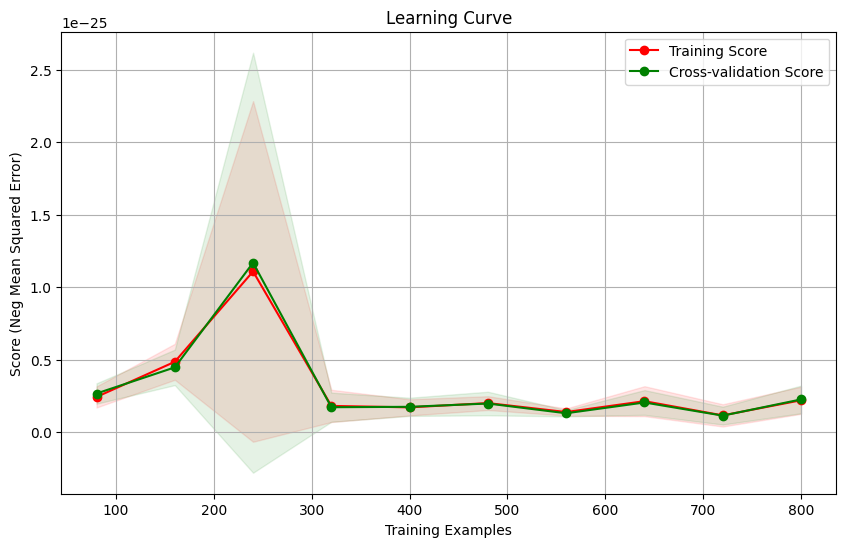

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression

# Generate hypothetical data
X, y = make_regression(n_samples=1000, n_features=10, random_state=42)

# Create a linear regression model
model_linear_regression = LinearRegression()

# Define the number of training examples at which to evaluate the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve scores
train_sizes, train_scores, test_scores = learning_curve(
    model_linear_regression,
    X, y,
    train_sizes=train_sizes,
    cv=5,
    scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

print('train_scores_mean:',train_scores_mean)
print('train_scores_std:',train_scores_std)
print('test_scores_mean:',test_scores_mean)
print('test_scores_std:',test_scores_std)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score (Neg Mean Squared Error)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-',
         color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-',
         color="g", label="Cross-validation Score")

plt.legend(loc="best")
plt.show()


train_scores_mean: [1.         0.9902439  0.98991597 0.98089172 0.98247423 0.98181818
 0.98432836 0.98104575 0.98483965 0.98631579 0.98800959 0.98945055]
train_scores_std: [0.         0.00487805 0.00336134 0.00805676 0.00412371 0.00636231
 0.00548393 0.00381108 0.00339997 0.00306892 0.0033914  0.00164468]
test_scores_mean: [0.77494178 0.92435957 0.95078404 0.95255395 0.95430834 0.95958702
 0.96662009 0.96485018 0.97011334 0.97890079 0.9806707  0.98068623]
test_scores_std: [0.04882254 0.02667099 0.02121456 0.01187693 0.02030237 0.00697192
 0.00651499 0.00554925 0.00706506 0.00897349 0.00858858 0.00653944]


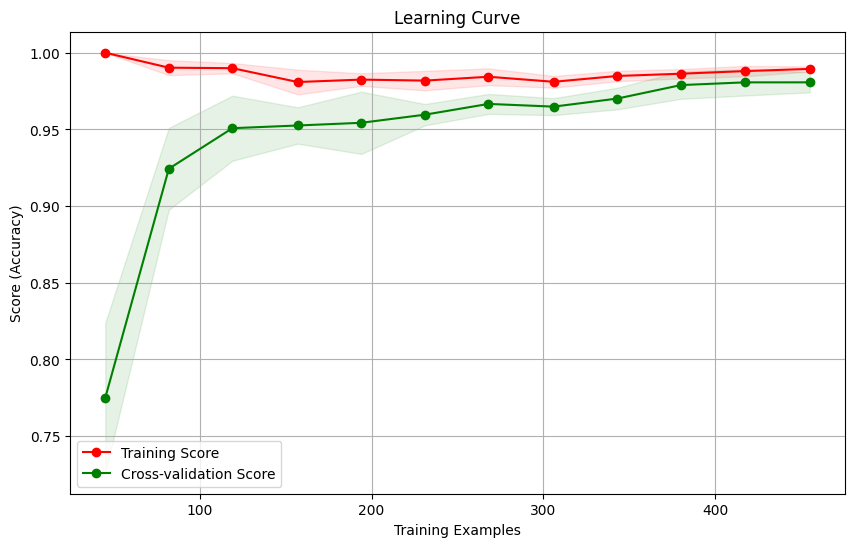

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Scale the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a logistic regression model
model_logistic_regression = LogisticRegression()

# Define the number of training examples at which to evaluate the learning curve
train_sizes = np.linspace(0.1, 1.0, 12)

# Calculate the learning curve scores
train_sizes, train_scores, test_scores = learning_curve(
    model_logistic_regression,
    X_scaled, y,
    train_sizes=train_sizes,
    cv=5,
    scoring='accuracy')

# Calculate the mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

print('train_scores_mean:', train_scores_mean)
print('train_scores_std:', train_scores_std)
print('test_scores_mean:', test_scores_mean)
print('test_scores_std:', test_scores_std)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score (Accuracy)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-',
         color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-',
         color="g", label="Cross-validation Score")

plt.legend(loc="best")
plt.show()
